In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("VS Code and Jupyter are ready! 🎉")


VS Code and Jupyter are ready! 🎉


In [3]:
# Load the Titanic dataset using comma as the delimiter
data = pd.read_csv('titanic.csv', delimiter=',')

# Show the first 5 rows to check if it works
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Check for missing values in each column
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Fill missing 'Age' with the median age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing 'Embarked' with the most common value
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column because it has too many missing values
data.drop(columns=['Cabin'], inplace=True)

# Check if there are still missing values
data.isnull().sum()


/var/folders/yq/nd4r1ddx0mz64hpjjtxzct8m0000gn/T/ipykernel_10052/898619538.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
/var/folders/yq/nd4r1ddx0mz64hpjjtxzct8m0000gn/T/ipykernel_10052/898619538.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [6]:

# Get summary statistics for numerical columns
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


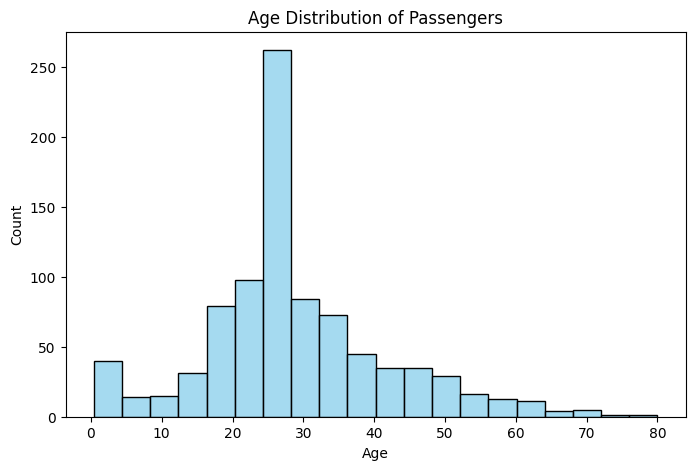

In [7]:
# Plot age distribution of passengers
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], bins=20, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.show()


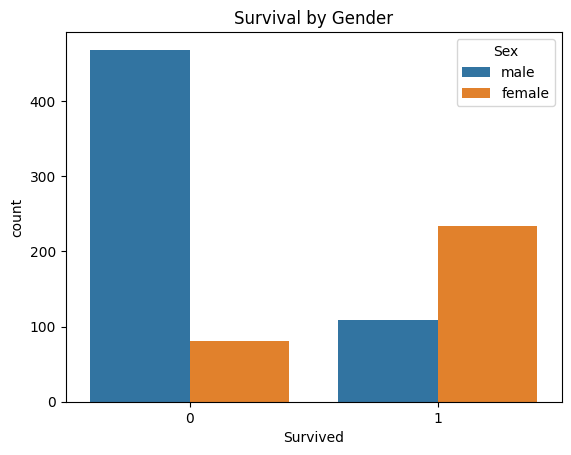

In [8]:
# Plot survival count by gender
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Survival by Gender')
plt.show()


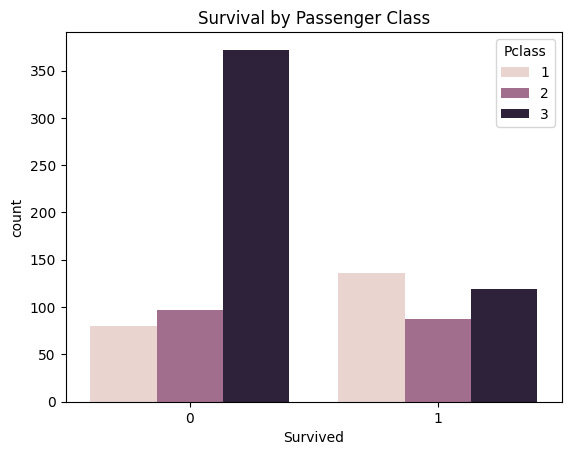

In [9]:
# Plot survival count by passenger class
sns.countplot(x='Survived', hue='Pclass', data=data)
plt.title('Survival by Passenger Class')
plt.show()


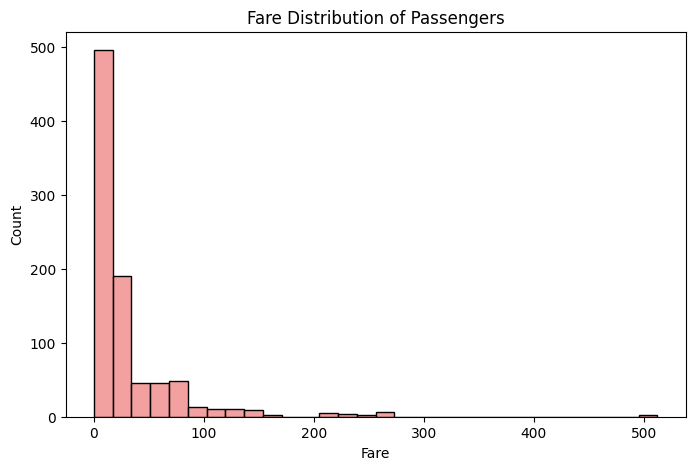

In [10]:
# Plot fare distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Fare'], bins=30, color='lightcoral')
plt.title('Fare Distribution of Passengers')
plt.show()


In [13]:
# Convert 'Sex' column to numeric: male = 0, female = 1
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Create dummy variables for 'Embarked' column
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Remove text columns ('Name', 'Ticket') for correlation heatmap
data_numeric = data.drop(columns=['Name', 'Ticket'])

# Show the first 5 rows to check
data_numeric.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,False,True
1,2,1,1,1,38.0,1,0,71.2833,False,False
2,3,1,3,1,26.0,0,0,7.9250,False,True
3,4,1,1,1,35.0,1,0,53.1000,False,True
4,5,0,3,0,35.0,0,0,8.0500,False,True


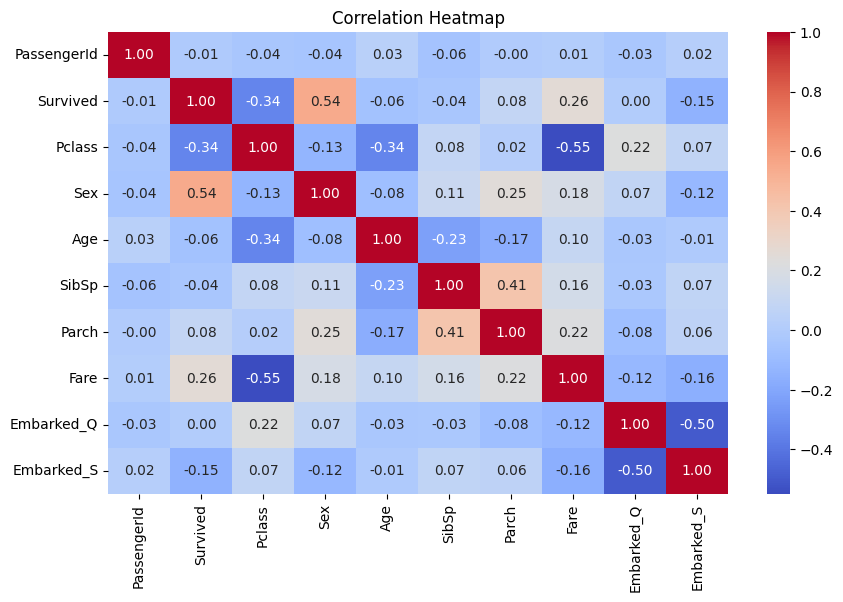

In [14]:
# Plot a correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [17]:
!python3 -m pip --version


pip 24.3.1 from /Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pip (python 3.13)


In [18]:
!python3 -m pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 953.4 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.7/38.7 MB 895.4 kB/s eta 0:00:0000:0100:02

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Libraries imported successfully! 🎉")


Libraries imported successfully! 🎉


In [20]:
# Define features (X) and target (y)
# We'll use numeric columns only
X = data_numeric[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked_Q', 'Embarked_S']]
y = data_numeric['Survived']

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Show the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((623, 8), (268, 8), (623,), (268,))

In [21]:
# Create and train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8097014925373134

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       157
           1       0.79      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



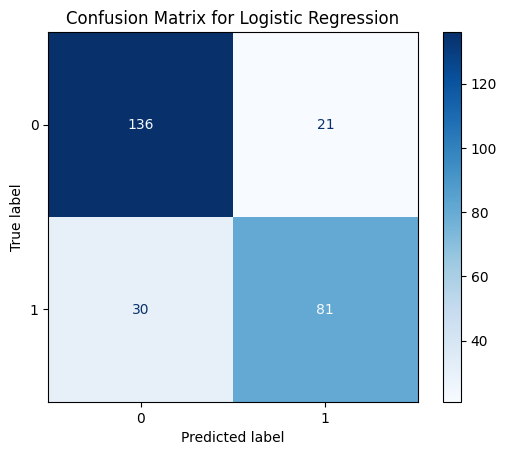

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


In [23]:
# Check coefficients to understand feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_[0]
}).sort_values(by='Importance', key=abs, ascending=False)

# Show the feature importance
feature_importance


,Feature,Importance
1,Sex,2.469584
0,Pclass,-0.906696
7,Embarked_S,-0.527055
4,SibSp,-0.266198
6,Embarked_Q,-0.116566
5,Parch,-0.082499
2,Age,-0.032843
3,Fare,0.002797
